# Assignment 5 part 1
**Directions** Acquire power data for at least 10 days. Load the data into a Jupyter Notebook. Create two bar graphs of the power consumption per hour:
One bar graph has 24 bars; 
one bar graph has 24*(number of days) bars. 


**TLDR** load CSV, create datetime dataframe, resample CSV data, and slice data to create 2 bar graphs 

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

**COMMENT** use pandas (pd) to open the CSV file w/ pd.read_csv( ), this will also create a dataframe

NOTE: Because the csv file was too big in download, I had to download 2 files to include all 10 days. I will combine both of the files by using pd.concat(map( )) and again open the files with pd.read_csv( ) but now with [  ] to add in the multiple files 
Otherwise...if you have a single file you can simply open and create a df with 
df = pd.read_csv('/Users/hafsachaudhry/Downloads/RollingSystemDemand_20211028_0150.csv')

Once completed we will print out the dataframe loaded. As you can see below, there are 2 issues. 
1. the dataframe is a collection of information for every 5 minutes and
2. the HDR dates and time values look funky

In [204]:
df = pd.concat(map(pd.read_csv,['/Users/hafsachaudhry/Downloads/RollingSystemDemand_20211028_0150.csv','/Users/hafsachaudhry/Downloads/RollingSystemDemand_20211028_0152.csv']),ignore_index=True)
df = df.dropna() #drops the empty slots 

print(df)
print("**************************************************************")

                 HDR  ROLLING SYSTEM DEMAND
0     20211017000000                21223.0
1     20211017000500                21430.0
2     20211017001000                21523.0
3     20211017001500                21486.0
4     20211017002000                21564.0
...              ...                    ...
3148  20211027233500                22283.0
3149  20211027234000                22205.0
3150  20211027234500                22108.0
3151  20211027235000                21942.0
3152  20211027235500                21860.0

[3152 rows x 2 columns]
**************************************************************


**COMMENT** use pd.to_datetime to convert 20211017001500 to 2021-10-17 00:15:00 so that we can easily see the date+time stamps

In [205]:
#convert 20211017001500 to 2021-10-17 00:15:00
df['HDR'] = pd.to_datetime(df['HDR'],format='%Y%m%d%H%M%S')

print(df)
print("**************************************************************")

                     HDR  ROLLING SYSTEM DEMAND
0    2021-10-17 00:00:00                21223.0
1    2021-10-17 00:05:00                21430.0
2    2021-10-17 00:10:00                21523.0
3    2021-10-17 00:15:00                21486.0
4    2021-10-17 00:20:00                21564.0
...                  ...                    ...
3148 2021-10-27 23:35:00                22283.0
3149 2021-10-27 23:40:00                22205.0
3150 2021-10-27 23:45:00                22108.0
3151 2021-10-27 23:50:00                21942.0
3152 2021-10-27 23:55:00                21860.0

[3152 rows x 2 columns]
**************************************************************


**COMMENT** use resample( ) to get data per hour instead of per every 5 minutes. Get the correct resampled values per hour by collecting the mean. 

NOTE: When we resampled the data below, it moved HDR from a column to an index so you have to add .reset_index( ) at the end to have HDR remain a column to plot 

Lets also print out the new dataframe to double check our values

In [206]:
df2 = df.resample('1H', on='HDR').mean().reset_index()

In [229]:
# check if all columns are still there: print(df2.columns)
# print first 10 values and dataframe info to check if resample worked:
print(df2.head(10),"\n")
print("\n")
print(df2.info())
print("**************************************************************")

                  HDR  ROLLING SYSTEM DEMAND
0 2021-10-17 00:00:00           21550.333333
1 2021-10-17 01:00:00           21342.833333
2 2021-10-17 02:00:00           20755.833333
3 2021-10-17 03:00:00           20436.666667
4 2021-10-17 04:00:00           20399.250000
5 2021-10-17 05:00:00           21477.000000
6 2021-10-17 06:00:00           22780.916667
7 2021-10-17 07:00:00           25324.333333
8 2021-10-17 08:00:00           28128.083333
9 2021-10-17 09:00:00           29574.250000 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   HDR                    264 non-null    datetime64[ns]
 1   ROLLING SYSTEM DEMAND  263 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB
None
**************************************************************


**COMMENT** now that we have per hour, it cut the data frame from 3152 entries to 264 entries... BUT we still only need to plot 24 bars in our first bar graph. This implies that we are only collecting the first 24 hours of the first day

TO DO THIS: lets slice our df again but this time by using iloc. iloc only selects values in the [ ] 

THEN: we will use the plot.bar( ) method to actually plot the data

**BAR GRAPH 1**

Text(0, 0.5, 'Demand (RSD)')

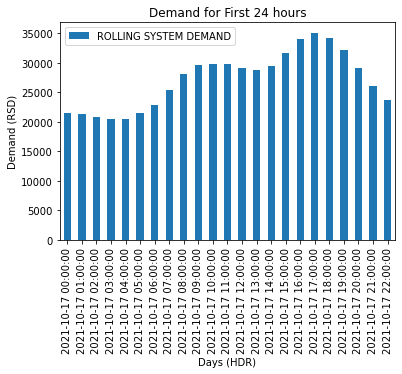

In [285]:
# bar graph 1: 24 hours of first day 
df2.iloc[0:23].plot.bar(x = 'HDR', y = 'ROLLING SYSTEM DEMAND') 
plt.title("Demand for First 24 hours")
plt.xlabel("Days (HDR)")
plt.ylabel("Demand (RSD)")

**COMMENT** For our next bar graph, I only need 24x(days). If I plot the bar graph I encounter 2 problems 

1. I have 264 entries of data instead of 240 (because I downloaded the data mid-day, so I have a few extra hours of data)
2. My labels are all jumbled up together and creating one big black mush

**ERROR**

<AxesSubplot:xlabel='HDR'>

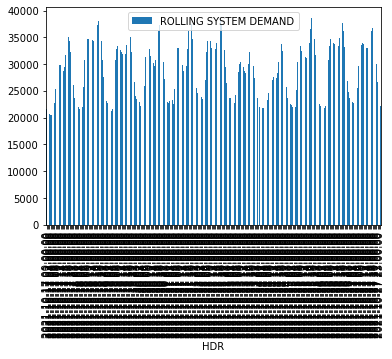

In [227]:
df2.plot.bar(x = 'HDR', y = 'ROLLING SYSTEM DEMAND')

**COMMENT** Lets fix the above graph by: 
1. using iloc again to collect neccesary data only
2. use matplotlib.plyplot as plt to access xticks 

plt.xticks will allow for me to select only the neccessary x-axis ticks, index 0-23 = 1 full day so count the necessary tick locations in the first [ ] by adding another 24. and then I also relabel it in the next [ ] 

**FIXED**

**BAR GRAPH 2**

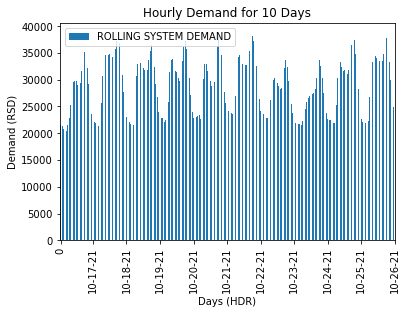

In [295]:
# bar graph 2: 24*10 = 240 entries 
df2.iloc[0:239].plot.bar(y = 'ROLLING SYSTEM DEMAND')
plt.xticks([0,23,47,71,95,119,143,167,191,215,239],["0","10-17-21","10-18-21","10-19-21","10-20-21","10-21-21","10-22-21","10-23-21","10-24-21","10-25-21","10-26-21"])
plt.title("Hourly Demand for 10 Days")
plt.xlabel("Days (HDR)")
plt.ylabel("Demand (RSD)")
plt.show()

# Assignment 5 part 2
**Directions** Simulate a fair die and a biased 6-sided die. The biased die has probabilities {0.15, 0.15, 0.15, 0.15, 0.15, 0.25}. Create a visualization that compares outcomes of multiple rolls of a fair die and this biased die. You can use a single visualization or multiple visualizations to demonstrate the difference in outcomes for the dice. The user of your notebook should be able to alter the number of simulations as an argument to a function.

In [235]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [296]:
fair_user = int(input("How many times do you want to roll the fair dice? "))
bias_user = int(input("How many times do you want to roll the bias dice? "))

How many times do you want to roll the fair dice? 5
How many times do you want to roll the bias dice? 7


In [293]:
#both have in common
dice_heads = [1,2,3,4,5,6]

#both differ
# aka              [ 1,    2,   3,   4,   5,   6 ]
bias_probability = [0.15,0.15,0.15,0.15,0.15,0.25] 
# aka 25% chance of getting a 6 and 75% of everything else

#throws
fair = random.choice(dice_heads, size = fair_user)
bias = random.choice(dice_heads, p=bias_probability, size=bias_user)

#make sure it works by printing the throws for both 
print(list(fair))
print(list(bias))

[1, 1, 5, 5, 5]
[6, 3, 1, 3, 5, 4, 5, 1]


Then I created 2 dataframes, one for fair throws and one for bias throws. Concatinate the two together and then print the dataframe for visual

In [289]:
df_fair = pd.DataFrame({'fair dice':fair}) 
df_bias = pd.DataFrame({'bias dice':bias})
df = pd.concat([df_fair,df_bias],axis=1)
print(df.columns)
df

Index(['fair dice', 'bias dice'], dtype='object')


,fair dice,bias dice
0,2.0,1
1,3.0,5
2,3.0,4
3,3.0,1
4,2.0,4
5,NaN,1
6,NaN,1
7,NaN,3


**BAR GRAPH VISUAL** 

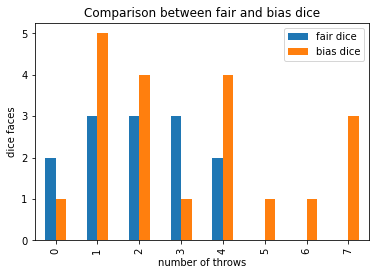

In [290]:
df.plot.bar()
plt.title("Comparison between fair and bias dice")
plt.xlabel("number of throws")
plt.ylabel("dice faces")
plt.show()

**HISTOGRAM VISUAL**

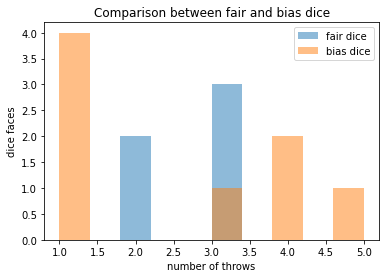

In [294]:
df.plot.hist(alpha=0.5)
plt.title("Comparison between fair and bias dice")
plt.xlabel("number of throws")
plt.ylabel("dice faces")
plt.show()